In [1]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [2]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))

        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.23972_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'MIN_LR': 1e-06,
 'NUM_WORKERS': 4,
 'PLATEAU_FACTOR': 0.9,
 'PLATEAU_PATIENCE': 0,
 'PLAT_EPOCHS_WARMUP': 999,
 'SHORT_UNITS': 64,
 'TRAIN_BATCH': 64,
 'TRAIN_PREFETCH_FACTOR': 2,
 'T_0': 90,
 'T_MULT': 1,
 'VAL_BATCH': 1,
 'WEIGHT_DECAY': 3e-05}


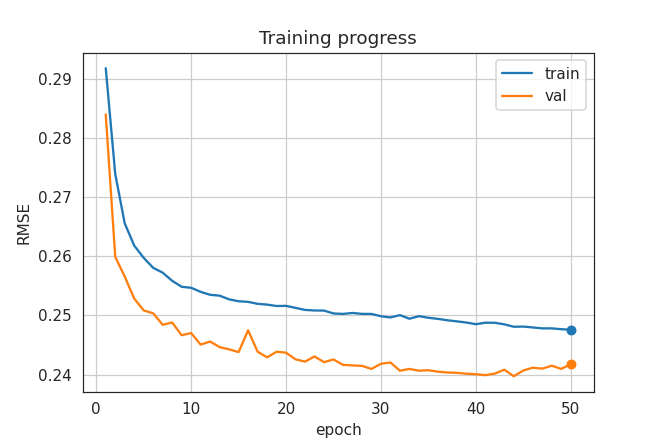


Train metrics: {'rmse': 0.2480776011943817, 'mae': 0.18824651837348938, 'r2': 0.2680216431617737, 'acc': 0.34663495421409607, 'prec': 0.2492406964302063, 'rec': 0.7129225730895996, 'f1': 0.3693537712097168, 'auroc': 0.46000605821609497}
 Val metrics: {'rmse': 0.23971986770629883, 'mae': 0.1751440018415451, 'r2': 0.28346341848373413, 'acc': 0.28133395314216614, 'prec': 0.2375885397195816, 'rec': 0.7370356917381287, 'f1': 0.359341025352478, 'auroc': 0.4264795184135437}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24039_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'MIN

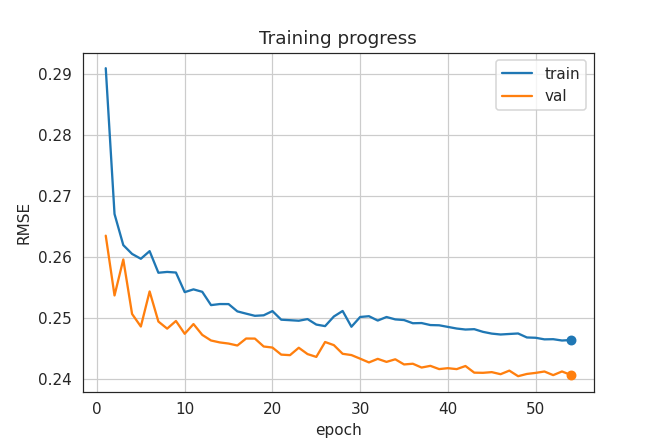


Train metrics: {'rmse': 0.24741771817207336, 'mae': 0.18679679930210114, 'r2': 0.2713252305984497, 'acc': 0.4217455983161926, 'prec': 0.17647260427474976, 'rec': 0.30569925904273987, 'f1': 0.223768949508667, 'auroc': 0.3363458514213562}
 Val metrics: {'rmse': 0.24039407074451447, 'mae': 0.1813189834356308, 'r2': 0.288735032081604, 'acc': 0.3045198321342468, 'prec': 0.18251080811023712, 'rec': 0.4254363477230072, 'f1': 0.25543907284736633, 'auroc': 0.29664701223373413}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24260_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'MI

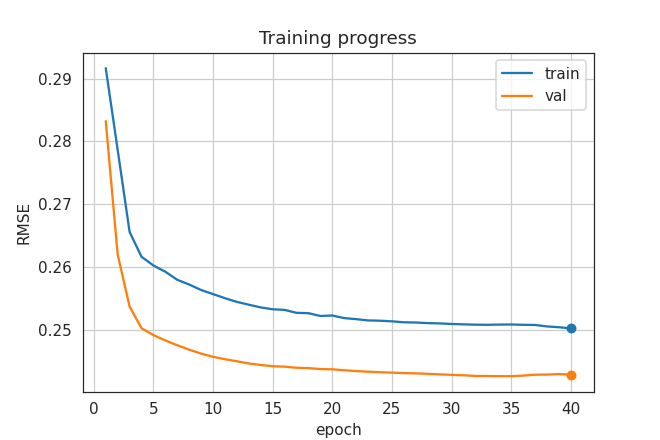


Train metrics: {'rmse': 0.25082677602767944, 'mae': 0.19196707010269165, 'r2': 0.25170838832855225, 'acc': 0.3797435462474823, 'prec': 0.28129884600639343, 'rec': 0.8432267308235168, 'f1': 0.42186450958251953, 'auroc': 0.5634651184082031}
 Val metrics: {'rmse': 0.24260444939136505, 'mae': 0.18113167583942413, 'r2': 0.2661152482032776, 'acc': 0.35356640815734863, 'prec': 0.281869113445282, 'rec': 0.8812391757965088, 'f1': 0.42712119221687317, 'auroc': 0.5589879751205444}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24263_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 '

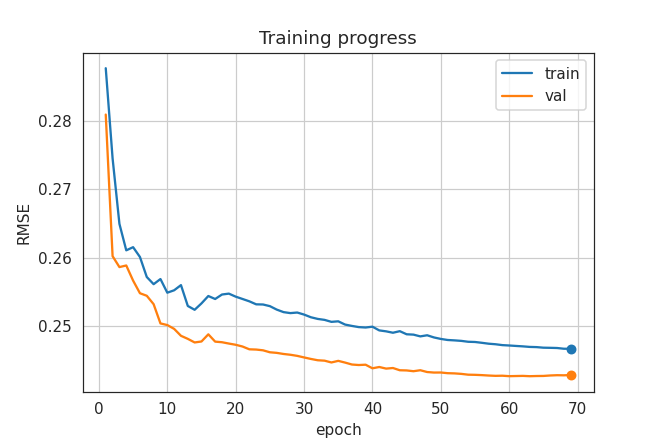


Train metrics: {'rmse': 0.2469158172607422, 'mae': 0.18783096969127655, 'r2': 0.2774110436439514, 'acc': 0.5326219797134399, 'prec': 0.2814924418926239, 'rec': 0.44413527846336365, 'f1': 0.34458640217781067, 'auroc': 0.5112457871437073}
 Val metrics: {'rmse': 0.24262893199920654, 'mae': 0.18311525881290436, 'r2': 0.28536421060562134, 'acc': 0.5260273814201355, 'prec': 0.30916059017181396, 'rec': 0.5263082385063171, 'f1': 0.38951486349105835, 'auroc': 0.5464065074920654}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24397_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 '

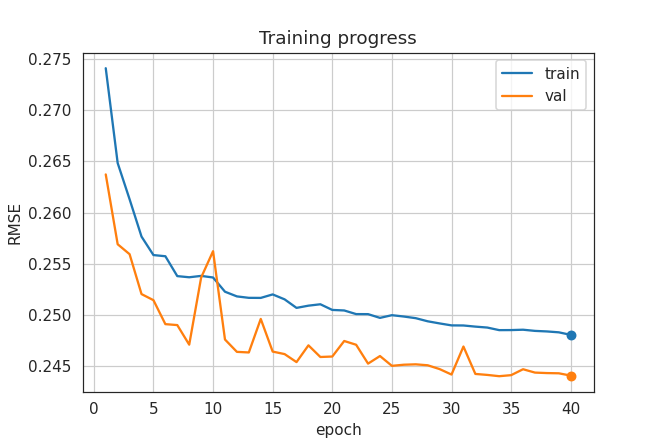


Train metrics: {'rmse': 0.24847911298274994, 'mae': 0.19007329642772675, 'r2': 0.27636224031448364, 'acc': 0.669701337814331, 'prec': 0.3613009750843048, 'rec': 0.2223912924528122, 'f1': 0.2753169536590576, 'auroc': 0.5499573349952698}
 Val metrics: {'rmse': 0.24396806955337524, 'mae': 0.18288175761699677, 'r2': 0.2874990701675415, 'acc': 0.7018101215362549, 'prec': 0.480690598487854, 'rec': 0.12979872524738312, 'f1': 0.2044033408164978, 'auroc': 0.5880994200706482}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24539_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'MIN_

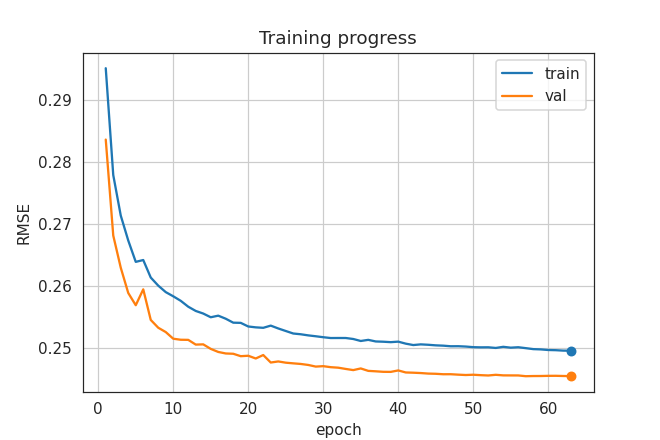


Train metrics: {'rmse': 0.249924898147583, 'mae': 0.19039702415466309, 'r2': 0.2679166793823242, 'acc': 0.6005703210830688, 'prec': 0.2994519770145416, 'rec': 0.31041643023490906, 'f1': 0.30483564734458923, 'auroc': 0.5002303123474121}
 Val metrics: {'rmse': 0.24539156258106232, 'mae': 0.18577200174331665, 'r2': 0.2791602611541748, 'acc': 0.5985684990882874, 'prec': 0.33853381872177124, 'rec': 0.37767133116722107, 'f1': 0.35703322291374207, 'auroc': 0.5197067260742188}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24682_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'M

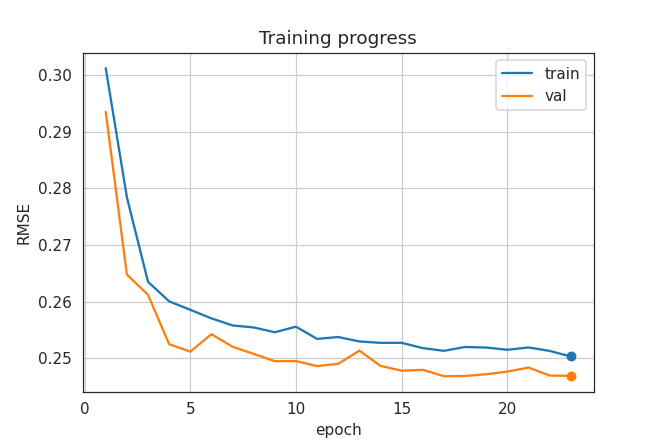


Train metrics: {'rmse': 0.2512972056865692, 'mae': 0.19183270633220673, 'r2': 0.25985509157180786, 'acc': 0.5508121848106384, 'prec': 0.13634870946407318, 'rec': 0.11101147532463074, 'f1': 0.12238243222236633, 'auroc': 0.33519989252090454}
 Val metrics: {'rmse': 0.24681849777698517, 'mae': 0.18603669106960297, 'r2': 0.27075260877609253, 'acc': 0.5589032769203186, 'prec': 0.06362742185592651, 'rec': 0.036064133048057556, 'f1': 0.04603534936904907, 'auroc': 0.2527332603931427}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24825_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.2,
 'ATT_HEADS': 6,
 'CLIPNORM': 0.5,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.3,
 'DROPOUT_SHORT': 0.25,
 'EARLY_STOP_PATIENCE': 7,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 0.0001,
 'LONG_UNITS': 128,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS':

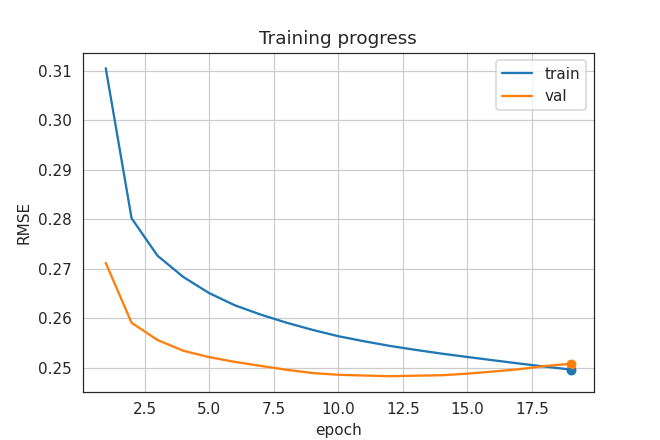


Train metrics: {'rmse': 0.25437867641448975, 'mae': 0.1931043118238449, 'r2': 0.22974669933319092, 'acc': 0.7596630454063416, 'prec': 0.6249063611030579, 'rec': 0.29645368456840515, 'f1': 0.4021354913711548, 'auroc': 0.7355121374130249}
 Val metrics: {'rmse': 0.24825294315814972, 'mae': 0.18249177932739258, 'r2': 0.2414700984954834, 'acc': 0.7571249604225159, 'prec': 0.6869074106216431, 'rec': 0.2460215538740158, 'f1': 0.3622870147228241, 'auroc': 0.7541027665138245}

------------------------------------------------------------------------------------------------------------------------------



{}

In [3]:
load_all_checkpoints("AAPL")